In [1]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("hourly_data.pa")

# 按symbol和时间排序
df = data.sort(['symbol', 'open_time'])

# 计算对数收益率
df = df.with_columns([
    (pl.col("close") / pl.col("close").shift(1)).log().over("symbol").alias("log_return"),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])


# 定义窗口大小
window_size = 20

# 计算反转因子
df = df.with_columns([
    pl.col("log_return").rolling_sum(window_size).over("symbol").alias("reversal_factor")
])

# 显示结果
df


open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,log_return,return,reversal_factor
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",null,null,null
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",0.018019,0.018182,null
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",-0.00809,-0.008057,null
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",-0.058308,-0.056641,null
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",-0.033364,-0.032814,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",0.001338,0.001339,0.009402
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",0.0,0.0,0.006034
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",-0.004019,-0.004011,-0.008687


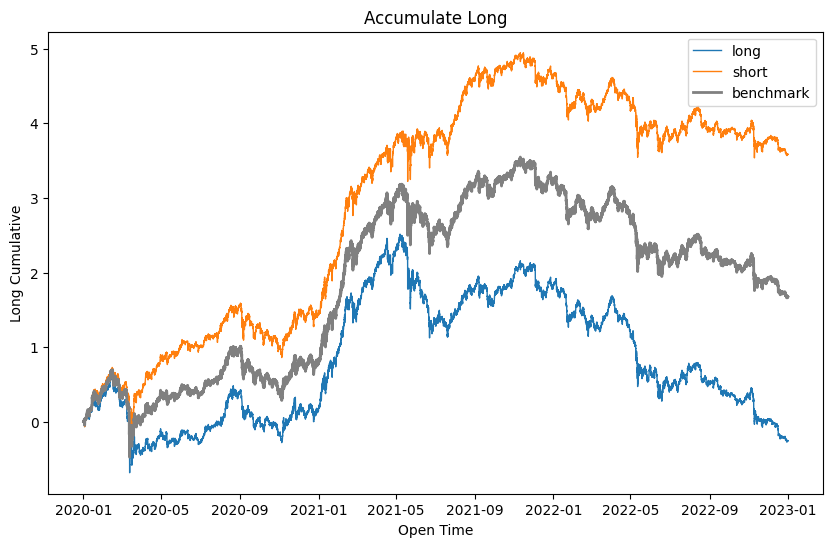

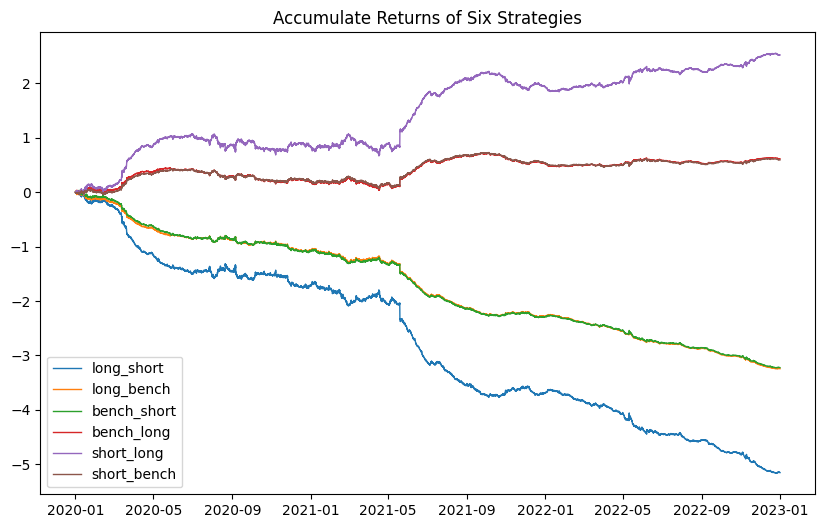

long: 
ann_return = -0.0851  sharpe = -0.0787  maxdd = 0.8045  calmar_ratio = -0.1057  

short: 
ann_return = 1.1935  sharpe = 1.0636  maxdd = 0.5982  calmar_ratio = 1.9952  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.7166  sharpe = -4.8138  maxdd = 5.1121  calmar_ratio = -0.3358  

long_bench: 
ann_return = -1.0806  sharpe = -5.9909  maxdd = 3.2523  calmar_ratio = -0.3323  

bench_long: 
ann_return = 0.2046  sharpe = 1.1342  maxdd = 0.2843  calmar_ratio = 0.7197  

short_long: 
ann_return = 0.8406  sharpe = 2.3572  maxdd = 0.1961  calmar_ratio = 4.286  

short_bench: 
ann_return = 0.198  sharpe = 1.1013  maxdd = 0.2542  calmar_ratio = 0.7789  

bench_short: 
ann_return = -1.074  sharpe = -5.9741  maxdd = 3.151  calmar_ratio = -0.3408  



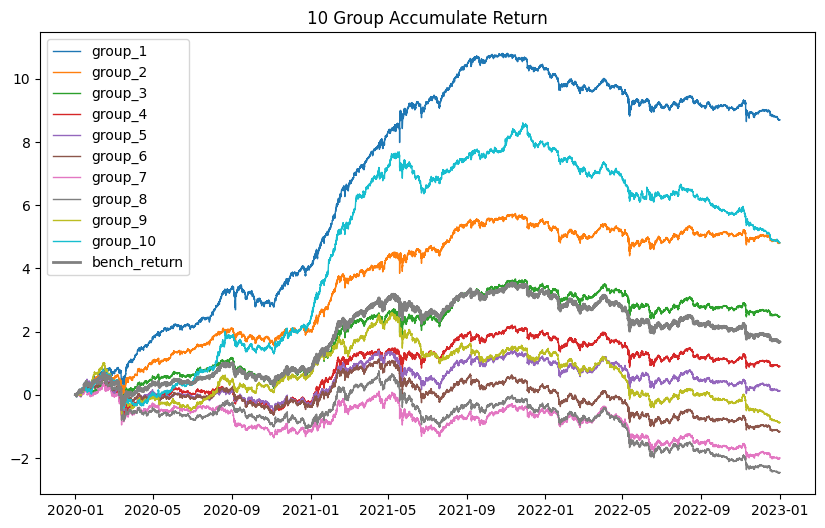

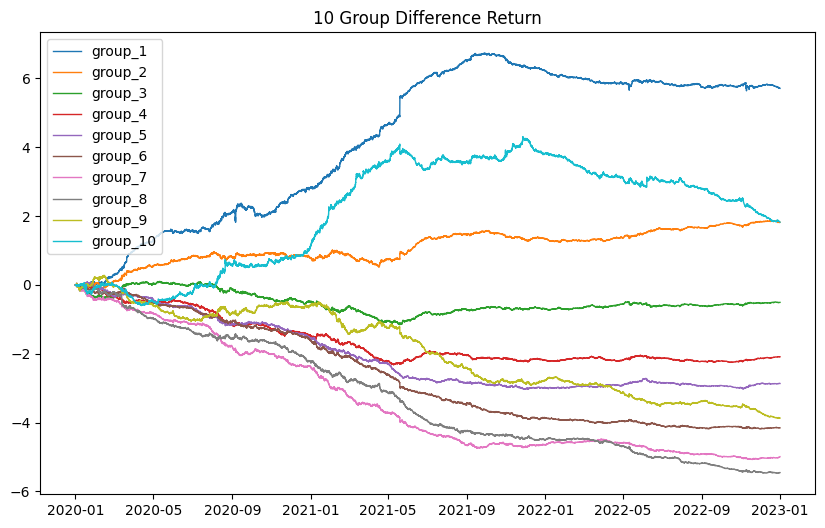

group_1: 
ann_return = 2.8958  sharpe = 2.203  maxdd = 0.4331  calmar_ratio = 6.6858  

group_2: 
ann_return = 1.6008  sharpe = 1.3804  maxdd = 0.5404  calmar_ratio = 2.9624  

group_3: 
ann_return = 0.8258  sharpe = 0.7371  maxdd = 0.7471  calmar_ratio = 1.1053  

group_4: 
ann_return = 0.3  sharpe = 0.2742  maxdd = 0.8677  calmar_ratio = 0.3457  

group_5: 
ann_return = 0.0419  sharpe = 0.0383  maxdd = 0.7438  calmar_ratio = 0.0564  

group_6: 
ann_return = -0.3874  sharpe = -0.3583  maxdd = 1.0821  calmar_ratio = -0.358  

group_7: 
ann_return = -0.667  sharpe = -0.6137  maxdd = 1.7472  calmar_ratio = -0.3818  

group_8: 
ann_return = -0.8196  sharpe = -0.7381  maxdd = 1.8437  calmar_ratio = -0.4445  

group_9: 
ann_return = -0.2929  sharpe = -0.2562  maxdd = 0.9682  calmar_ratio = -0.3025  

group_10: 
ann_return = 1.6013  sharpe = 1.2422  maxdd = 0.7078  calmar_ratio = 2.2626  

-----------------------------------------
group_difference_1: 
ann_return = 1.9003  sharpe = 3.6779  ma

In [2]:
factors = df.select(["symbol", "open_time", "reversal_factor"])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()